In [10]:
import numpy as np
def generate_table(seed, difficulty):
    background_color = "BLACK"
    text_color = "WHITE"
    if difficulty == 9:
        background_color = "WHITE"
        text_color = "BLACK"
    if difficulty == 7:
        background_color = "YELLOW"
        text_color = "BLUE"
    np.random.seed(seed)
    all_headers = ["ADE20K", "Cityscapes", "Mapillary Vistas", "A-847", "PC-459", "A-150", "PC-59"]
    row_methods = ["ALIGN [38, 28]", "ALIGN w/ proposal [38, 28]", "LSeg+ [46, 28]", "OpenSeg [28]", "OpenSeg [28] w/ L. Narr", r"\textbf{FC-CLIP (ours)}"]
    chosen_methods = "\\text{" + np.random.choice(row_methods, min(6, 2 + difficulty//2), replace=False) + "}"
    headers = list("\\text{" + np.random.choice(all_headers, min(7, 2 + (difficulty+1)//2), replace=False) + "}")
    rows = [[chosen_methods[k]] +\
            list(np.round(np.clip(np.random.normal(np.random.uniform(20, 80), 25/(1+difficulty), len(headers)), 0, 100), 2)) 
            for k in range(len(chosen_methods))]
    rows_t = np.array(rows)
    selected_method = str(np.random.choice(chosen_methods))
    row = rows_t[list(chosen_methods).index(selected_method), ]
    row = np.float64(row[1:])
    max_val = np.max(row)
    answer = headers[list(row).index(max_val)][6:-1]
    question = \
f"Question: On which column does the {selected_method[selected_method.find("{")+1:selected_method.find("}")]} method achieve the highest score?\nPlease answer with a just a column header and nothing else"
    with open(f"table-188/188-2_cols_{seed}_{difficulty}.py", "w") as file:
        file.write(f'''from manim import *

config.background_color = {background_color}

class GroundingSegmentationTable(Scene):
    def construct(self):
        title = Text(\'\'\'On which column does the {selected_method[selected_method.find("{")+1:selected_method.find("}")]} method achieve the highest score?\nPlease answer with a just a column header and nothing else\'\'\', font_size=20, color={text_color})
        title.to_edge(UP)
        self.play(Write(title))
        self.wait(0.5)
        headers = [\"\\\\text{{method}}\"] + {headers}
        rows = {rows}
        table_data = [headers] + rows
        table = MathTable(
            table_data,
            include_outer_lines=True,
            h_buff=0.5,
            v_buff=0.3,
        ).scale(0.55)
        for entry in table.get_entries():
                entry.set_color({text_color})
        for line in table.get_horizontal_lines() + table.get_vertical_lines():
            line.set_color({text_color})
        self.play(Create(table.get_horizontal_lines()[0]), run_time=0.5)
        self.play(Create(table.get_vertical_lines()), run_time=0.5)
        self.play(Create(table.get_horizontal_lines()[1:]), run_time=0.5)
        columns = table.get_columns()
        for column in columns:
            self.play(FadeIn(column), run_time=0.5)
            self.play(FadeOut(column), run_time=0.5)
                   ''')
    
    return question, answer


Image ID: 15


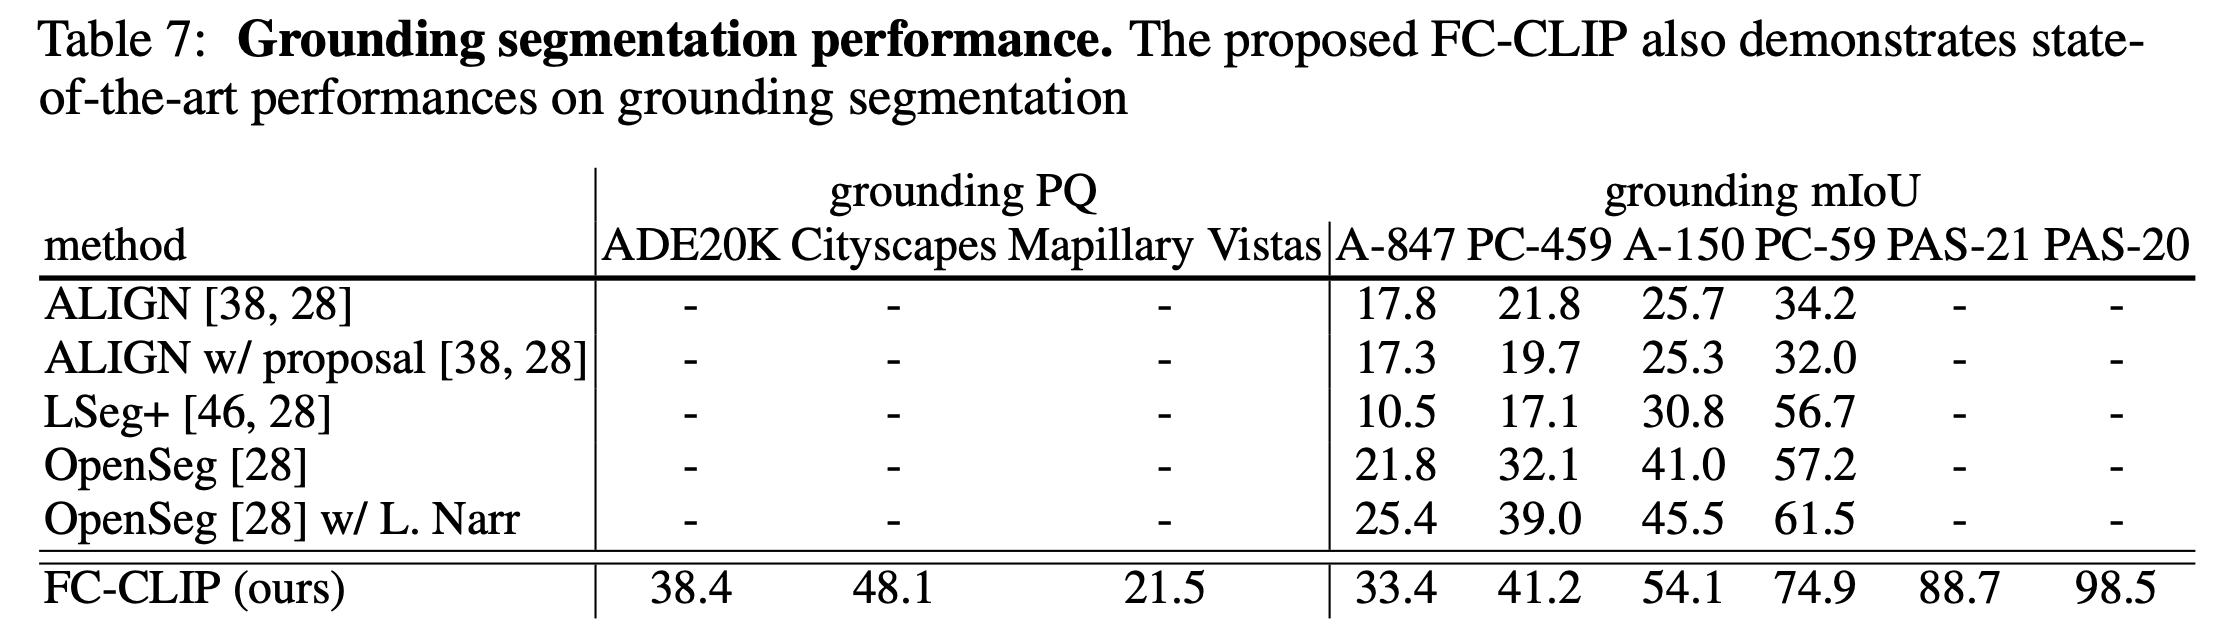

Question:
Hint: Please answer the question requiring an integer answer and provide the final value, e.g., 1, 2, 3, at the end.
Question: How many methods in the table achieve an A-847 score higher than 20.0?

Answer:
3


In [11]:
from IPython.display import display, Video
from datasets import load_dataset
dataset = load_dataset("AI4Math/MathVista")
data = dataset["testmini"]
example = data[187]
print(f"\nImage ID: {15}")
display(example["decoded_image"])
question = example["query"]
print(f"Question:\n{question}")
answer = example["answer"]
print(f"\nAnswer:\n{answer}")

In [12]:
import subprocess

for difficulty in range(10):
    seed = 44
    question, answer = generate_table(seed, difficulty)
    subprocess.run(f"manim -ql table-188/188-2_cols_{seed}_{difficulty}.py GroundingSegmentationTable")
    print(question)
    print(f"Answer: {answer}")
    display(Video(f"media/videos/188-2_cols_{seed}_{difficulty}/480p15/GroundingSegmentationTable.mp4", embed=True))
    if difficulty in {4, 7, 9}:
        with open('combined_questions.csv', 'a+') as file:
            file.write(f"media/videos/188-2_cols_{seed}_{difficulty}/480p15/GroundingSegmentationTable.mp4, {answer}, {question}\n")

Question: On which column does the LSeg+ [46, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: A-150


Question: On which column does the ALIGN [38, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: Cityscapes


Question: On which column does the ALIGN [38, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: Cityscapes


Question: On which column does the \textbf{FC-CLIP (ours) method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: Mapillary Vistas


Question: On which column does the LSeg+ [46, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: A-150


Question: On which column does the LSeg+ [46, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: Mapillary Vistas


Question: On which column does the LSeg+ [46, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: Mapillary Vistas


Question: On which column does the LSeg+ [46, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: PC-459


Question: On which column does the ALIGN w/ proposal [38, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: PC-59


Question: On which column does the ALIGN w/ proposal [38, 28] method achieve the highest score?
Please answer with a just a column header and nothing else
Answer: Mapillary Vistas
